# **pd_speech_features classification**

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA

### read dataset

In [3]:
df = pd.read_csv('pd_speech_features.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


### information about dataset

In [4]:
df.shape

(757, 755)

In [5]:
df.duplicated().sum()

1

In [6]:
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sum()

0

### fixing columns

In [10]:
df.columns = df.iloc[0]

In [11]:
df.drop(index=[0], inplace=True)

In [12]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


### size of records for each class

In [13]:
df.groupby('class').size()

class
0    192
1    563
dtype: int64

This is an imbalanced dataset as you can see

### deleting unrelated rows

In [14]:
df.drop(columns=['id'], inplace=True)

In [15]:
df.shape

(755, 754)

In [16]:
df['class'] = df["class"].astype(str).astype(int)

### building features and target arrays

In [17]:
X = df.iloc[:, :-1].values

In [18]:
y = df['class']

In [19]:
X.shape

(755, 753)

In [20]:
y.shape

(755,)

### spilitting data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape, X_test.shape)

(528, 753) (227, 753)


### scaling data

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [24]:
X_test = sc.transform (X_test)

Let's start by examining if we have a model that gives an output of 1 for each input, what our accuracy will be for the training and test data.

As you can see in the cell below, the accuracy of the training data is 75%, and the accuracy of the test data is 73%, which is somewhat acceptable. However, we need to improve this accuracy with machine learning algorithms.

In [23]:
test_set_acc_one= metrics.accuracy_score(y_test, np.ones(y_test.shape))
train_set_acc_one = metrics.accuracy_score(y_train, np.ones(y_train.shape))

print("Test set Accuracy: ", test_set_acc_one)
print("train set Accuracy: ", train_set_acc_one)

Test set Accuracy:  0.73568281938326
train set Accuracy:  0.75


Now we are creating a dataframe called "df_acc_before_pca" to store the accuracies of our 4 models before performing the PCA operation. These accuracies include the accuracy of the test data, the accuracy of the training data, cross-validation accuracy, and ROC-AUC score.

In [34]:
df_acc_before_pca = pd.DataFrame(columns=['cv_acc', 'test_set_acc', 'train_set_acc', 'ROC-AUC Score'])

# DecisionTreeClassifier

### finding depth

In [25]:
depth_list = [3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 20, 22, 25]
df_tree = pd.DataFrame()
mean_list = []

for depth in depth_list:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_tree['depth'] = depth_list
df_tree['mean acc in cross_validation'] = mean_list

In [26]:
df_tree

,depth,mean acc in cross_validation
0,3,0.759497
1,4,0.753872
2,5,0.757664
3,6,0.738760
4,7,0.736855
5,8,0.736819
6,10,0.731159
7,12,0.731123
8,15,0.755723
9,18,0.742462


### fitting model

In [29]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(X_train, y_train)
predict_tree = tree.predict(X_test)

### accuracy

Test set Accuracy:  0.8193832599118943
Train set Accuracy:  0.9526515151515151
[[154  13]
 [ 28  32]]
              precision    recall  f1-score   support

           0       0.71      0.53      0.61        60
           1       0.85      0.92      0.88       167

    accuracy                           0.82       227
   macro avg       0.78      0.73      0.75       227
weighted avg       0.81      0.82      0.81       227



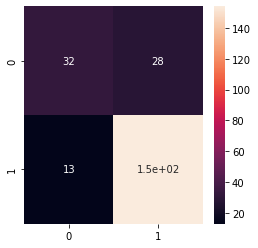

f1 is:  0.8825214899713467
ROC-AUC Score is:  0.7277445109780439


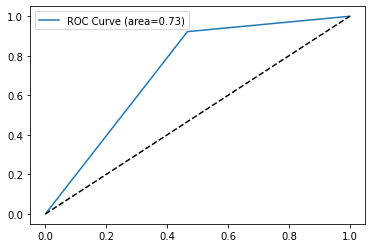

In [30]:
test_set_acc_tree = metrics.accuracy_score(y_test, predict_tree)
train_set_acc_tree = metrics.accuracy_score(y_train, tree.predict(X_train))

print("Test set Accuracy: ", test_set_acc_tree)
print("Train set Accuracy: ", train_set_acc_tree)

print(confusion_matrix(y_test, predict_tree, labels=[1,0]))
print (classification_report(y_test, predict_tree))
cm = confusion_matrix(y_test, predict_tree)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_tree))

score_tree = roc_auc_score(y_test, predict_tree)
print('ROC-AUC Score is: ', score_tree)
fpr, tpr, thresholds = roc_curve(y_test, predict_tree)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_tree)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

As you can see, the test and training accuracies are 82% and 95%, respectively. You can also visualize the confusion matrix information in the chart above. The average accuracy of cross-validation is 75%, and the F1-score of this model is 88%. Additionally, its ROC-AUC score is 0.72.

### adding to the dataframe

In [32]:
cv_acc = df_tree[df_tree.depth == 5]['mean acc in cross_validation'].values[0]
all_acc_tree = [cv_acc, test_set_acc_tree, train_set_acc_tree, score_tree]

In [35]:
df_acc_before_pca.loc['DecisionTreeClassifier'] = all_acc_tree

# KNeighborsClassifier

### find best parameter 

In [36]:
n_neighbors_list = [2,3,4,5,6,7,8,9,10]
df_knn = pd.DataFrame()
mean_list = []

for k in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_knn['n_neighbors'] = n_neighbors_list
df_knn['mean acc in cross_validation'] = mean_list

In [37]:
df_knn

,n_neighbors,mean acc in cross_validation
0,2,0.857951
1,3,0.839048
2,4,0.829650
3,5,0.822031
4,6,0.820198
5,7,0.823989
6,8,0.829686
7,9,0.812579
8,10,0.823899


### fitting model on train dataset

In [38]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

### accuracy

Test set Accuracy:  0.8634361233480177
Train set Accuracy:  0.9753787878787878
[[145  22]
 [  9  51]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        60
           1       0.94      0.87      0.90       167

    accuracy                           0.86       227
   macro avg       0.82      0.86      0.84       227
weighted avg       0.88      0.86      0.87       227



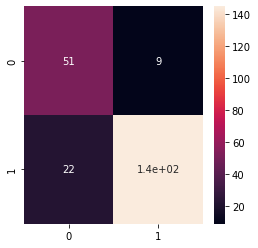

f1 is:  0.9034267912772586
ROC-AUC Score is:  0.8591317365269461


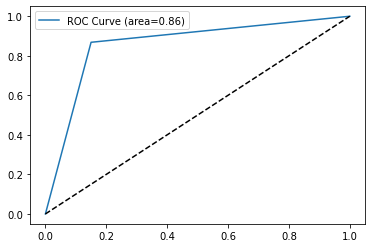

In [39]:
test_set_acc_knn = metrics.accuracy_score(y_test, predict_knn)
train_set_acc_knn = metrics.accuracy_score(y_train, knn.predict(X_train))

print("Test set Accuracy: ", test_set_acc_knn)
print("Train set Accuracy: ", train_set_acc_knn)

print(confusion_matrix(y_test, predict_knn, labels=[1,0]))
print (classification_report(y_test, predict_knn))
cm = confusion_matrix(y_test, predict_knn)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_knn))

score_knn = roc_auc_score(y_test, predict_knn)
print('ROC-AUC Score is: ', score_knn)
fpr, tpr, thresholds = roc_curve(y_test, predict_knn)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_knn)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

As you can see, the test and training accuracies are 86% and 97%, respectively. You can also visualize the confusion matrix information in the chart above. The average accuracy of cross-validation is 85%, and the F1-score of this model is 90%. Additionally, its ROC-AUC score is 0.86.

### adding to the dataframe

In [40]:
cv_acc = df_knn[df_knn.n_neighbors == 2]['mean acc in cross_validation'].values[0]
all_acc_knn = [cv_acc, test_set_acc_knn, train_set_acc_knn, score_knn]

In [41]:
df_acc_before_pca.loc['KNeighborsClassifier'] = all_acc_knn

# svm

### finding the best kernel

In [42]:
mean_list = []
kernel_list = ['rbf', 'poly', 'linear', 'sigmoid']
for kernel in kernel_list:
    clf = svm.SVC(kernel=kernel)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
mean_list

[0.8466486972147349,
 0.7934950584007188,
 0.8277807726864331,
 0.8314645103324348]

In [43]:
C_s = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 2, 5, 8, 10]
df_svm = pd.DataFrame()
mean_list = []

for C in C_s:
    clf = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_svm['C'] = C_s
df_svm['mean acc in cross_validation'] = mean_list

In [39]:
df_svm

,C,mean acc in cross_validation
0,0.001,0.750009
1,0.005,0.750009
2,0.010,0.750009
3,0.050,0.750009
4,0.100,0.750009
5,0.500,0.804942
6,0.800,0.837125
7,1.000,0.846649
8,2.000,0.856155
9,5.000,0.882695


### fitting model

In [48]:
clf = svm.SVC(kernel='rbf', C=8)
clf.fit(X_train, y_train)
predict_svm = clf.predict(X_test)

### accuracy

Test set Accuracy:  0.8678414096916299
Train set Accuracy:  1.0
[[161   6]
 [ 24  36]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        60
           1       0.87      0.96      0.91       167

    accuracy                           0.87       227
   macro avg       0.86      0.78      0.81       227
weighted avg       0.87      0.87      0.86       227



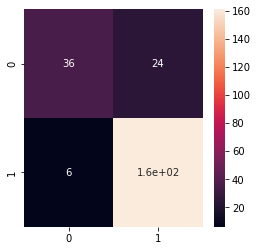

f1 is:  0.9147727272727274
ROC-AUC Score is:  0.7820359281437125


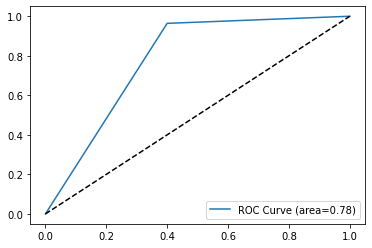

In [50]:
test_set_acc_svm = metrics.accuracy_score(y_test, predict_svm)
train_set_acc_svm = metrics.accuracy_score(y_train, clf.predict(X_train))

print("Test set Accuracy: ", test_set_acc_svm)
print("Train set Accuracy: ", train_set_acc_svm)

print(confusion_matrix(y_test, predict_svm, labels=[1,0]))
print (classification_report(y_test, predict_svm))
cm = confusion_matrix(y_test, predict_svm)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_svm))

score_svm = roc_auc_score(y_test, predict_svm)
print('ROC-AUC Score is: ', score_svm)
fpr, tpr, thresholds = roc_curve(y_test, predict_svm)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_svm)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

As you can see, the test and training accuracies are 86% and 100%, respectively. You can also visualize the confusion matrix information in the chart above. The average accuracy of cross-validation is 88%, and the F1-score of this model is 91%. Additionally, its ROC-AUC score is 0.78.

### adding to dataframe

In [51]:
cv_acc = df_svm[df_svm.C == 8]['mean acc in cross_validation'].values[0]
all_acc_svm = [cv_acc, test_set_acc_svm, train_set_acc_svm, score_svm]

In [52]:
df_acc_before_pca.loc['svm'] = all_acc_svm

# RandomForestClassifier

### finding the best parameter

In [64]:
depth_list = [2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 25]
df_forest = pd.DataFrame()
mean_list = []

for depth in depth_list:
    forest = RandomForestClassifier(criterion="entropy", max_depth = depth)
    scores = cross_val_score(forest, X_train, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_forest['depth'] = depth_list
df_forest['mean acc in cross_validation'] = mean_list

In [65]:
df_forest

,depth,mean acc in cross_validation
0,2,0.803091
1,3,0.821977
2,4,0.842767
3,5,0.848464
4,6,0.852345
5,8,0.856083
6,10,0.854160
7,12,0.867511
8,15,0.863684
9,20,0.857934


### fitting model

In [68]:
forest = RandomForestClassifier(criterion="entropy", max_depth = 6)
forest.fit(X_train, y_train)
predict_forest = forest.predict(X_test)

### accuracy

Test set Accuracy:  0.8502202643171806
Train set Accuracy:  0.9867424242424242
[[164   3]
 [ 31  29]]
              precision    recall  f1-score   support

           0       0.91      0.48      0.63        60
           1       0.84      0.98      0.91       167

    accuracy                           0.85       227
   macro avg       0.87      0.73      0.77       227
weighted avg       0.86      0.85      0.83       227



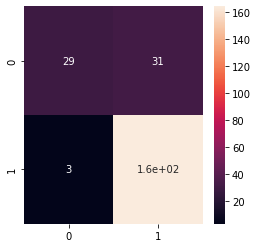

f1 is:  0.9060773480662984
ROC-AUC Score is:  0.7326846307385229


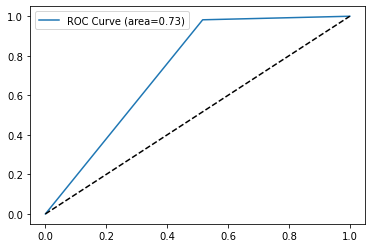

In [69]:
test_set_acc_forest = metrics.accuracy_score(y_test, predict_forest)
train_set_acc_forest = metrics.accuracy_score(y_train, forest.predict(X_train))

print("Test set Accuracy: ", test_set_acc_forest)
print("Train set Accuracy: ", train_set_acc_forest)

print(confusion_matrix(y_test, predict_forest, labels=[1,0]))
print (classification_report(y_test, predict_forest))
cm = confusion_matrix(y_test, predict_forest)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_forest))

score_forest = roc_auc_score(y_test, predict_forest)
print('ROC-AUC Score is: ', score_forest)
fpr, tpr, thresholds = roc_curve(y_test, predict_forest)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_forest)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

As you can see, the test and training accuracies are 85% and 98%, respectively. You can also visualize the confusion matrix information in the chart above. The average accuracy of cross-validation is 85%, and the F1-score of this model is 90%. Additionally, its ROC-AUC score is 0.73.

In [70]:
cv_acc = df_forest[df_forest.depth == 6]['mean acc in cross_validation'].values[0]
all_acc_forest = [cv_acc, test_set_acc_forest, train_set_acc_forest, score_forest]

In [71]:
df_acc_before_pca.loc['RandomForestClassifier'] = all_acc_forest

## Table of accuracies

In [72]:
df_acc_before_pca

,cv_acc,test_set_acc,train_set_acc,ROC-AUC Score
DecisionTreeClassifier,0.757664,0.819383,0.952652,0.727745
KNeighborsClassifier,0.857951,0.863436,0.975379,0.859132
svm,0.888374,0.867841,1.000000,0.782036
RandomForestClassifier,0.852345,0.850220,0.986742,0.732685


# PCA

Now, using PCA, we perform the feature extraction operation and repeat the previous steps. In this stage, we won't provide explanations for the four models as they are similar to the four models above. However, in the end, we will compare the accuracies of the models in two scenarios: before PCA and after PCA.

First, we consider the PCA parameter as 3. This means that we are looking for three desired eigenvectors from our feature vectors. Then, we observe the positions of the data points while knowing their classes.

In [102]:
pca = PCA(n_components=3)

In [95]:
X_train_pca = pca.fit_transform(X_train)

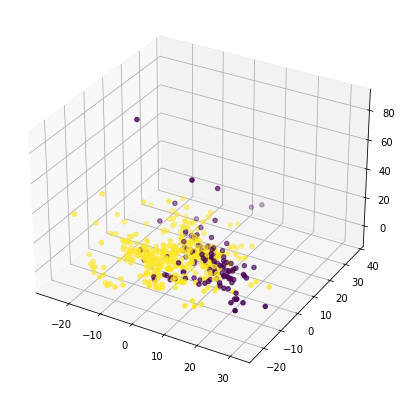

In [110]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_train_pca[:,0], X_train_pca[:,1],X_train_pca[:, 2], c=y_train)
plt.show()

Now, we set the PCA parameter to 2. This means that we are looking for two desired eigenvectors from our feature vectors. Then, we observe the positions of the data points while knowing their classes.

In [253]:
pca = PCA(n_components=2)

In [254]:
X_train_pca = pca.fit_transform(X_train)

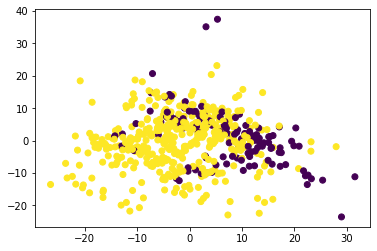

In [255]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.show()

As you can see, in the case where the parameter is set to 3, data separation is easier.

Now, after testing a large number of n_component parameters, we have concluded that the number 40 can be a good parameter for running PCA. Continuing with:

In [313]:
pca = PCA(n_components=30)

In [314]:
X_train_pca = pca.fit_transform(X_train)

In [315]:
X_test_pca = pca.transform(X_test)

Now we are creating a dataframe called "df_acc_after_pca" to store the accuracies of our 4 models after performing the PCA operation. These accuracies include the accuracy of the test data, the accuracy of the training data, cross-validation accuracy, and ROC-AUC Score.

In [316]:
df_acc_after_pca = pd.DataFrame(columns=['cv_acc', 'test_set_acc', 'train_set_acc', 'ROC-AUC Score'])

# DecisionTree

In [317]:
depth_list = [3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 20, 22, 25]
df_tree = pd.DataFrame()
mean_list = []

for depth in depth_list:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    scores = cross_val_score(tree, X_train_pca, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_tree['depth'] = depth_list
df_tree['mean acc in cross_validation'] = mean_list

In [318]:
df_tree

,depth,mean acc in cross_validation
0,3,0.765229
1,4,0.768931
2,5,0.778473
3,6,0.812650
4,7,0.788014
5,8,0.782372
6,10,0.788068
7,12,0.782390
8,15,0.776676
9,18,0.774753


In [319]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(X_train_pca, y_train)
predict_tree = tree.predict(X_test_pca)

Test set Accuracy:  0.8325991189427313
Train set Accuracy:  0.8977272727272727
[[150  17]
 [ 21  39]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        60
           1       0.88      0.90      0.89       167

    accuracy                           0.83       227
   macro avg       0.79      0.77      0.78       227
weighted avg       0.83      0.83      0.83       227



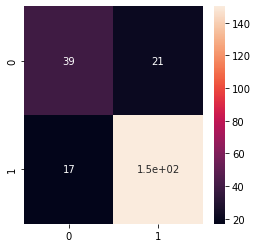

f1 is:  0.8875739644970414
ROC-AUC Score is:  0.7741017964071857


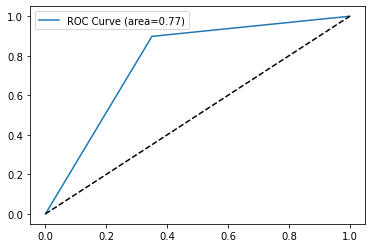

In [320]:
test_set_acc_tree = metrics.accuracy_score(y_test, predict_tree)
train_set_acc_tree = metrics.accuracy_score(y_train, tree.predict(X_train_pca))

print("Test set Accuracy: ", test_set_acc_tree)
print("Train set Accuracy: ", train_set_acc_tree)

print(confusion_matrix(y_test, predict_tree, labels=[1,0]))
print (classification_report(y_test, predict_tree))
cm = confusion_matrix(y_test, predict_tree)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_tree))

score_tree = roc_auc_score(y_test, predict_tree)
print('ROC-AUC Score is: ', score_tree)
fpr, tpr, thresholds = roc_curve(y_test, predict_tree)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_tree)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [321]:
cv_acc = df_tree[df_tree.depth == 7]['mean acc in cross_validation'].values[0]
all_acc_tree = [cv_acc, test_set_acc_tree, train_set_acc_tree, score_tree]
df_acc_after_pca.loc['DecisionTreeClassifier'] = all_acc_tree

# KNN

In [322]:
n_neighbors_list = [2,3,4,5,6,7,8,9,10]
df_knn = pd.DataFrame()
mean_list = []

for k in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_knn['n_neighbors'] = n_neighbors_list
df_knn['mean acc in cross_validation'] = mean_list
df_knn

,n_neighbors,mean acc in cross_validation
0,2,0.844636
1,3,0.837197
2,4,0.844726
3,5,0.816316
4,6,0.825822
5,7,0.833369
6,8,0.829614
7,9,0.831518
8,10,0.835328


In [323]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_pca, y_train)
predict_knn = knn.predict(X_test_pca)

Test set Accuracy:  0.7929515418502202
Train set Accuracy:  0.9696969696969697
[[130  37]
 [ 10  50]]
              precision    recall  f1-score   support

           0       0.57      0.83      0.68        60
           1       0.93      0.78      0.85       167

    accuracy                           0.79       227
   macro avg       0.75      0.81      0.76       227
weighted avg       0.84      0.79      0.80       227



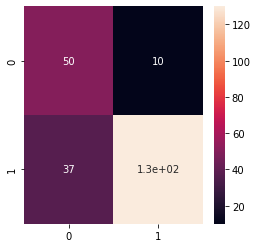

f1 is:  0.8469055374592835
ROC-AUC Score is:  0.8058882235528944


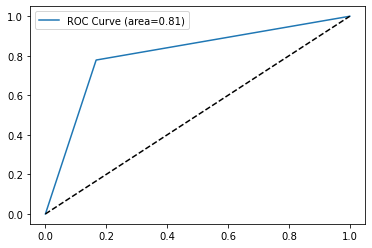

In [324]:
test_set_acc_knn = metrics.accuracy_score(y_test, predict_knn)
train_set_acc_knn = metrics.accuracy_score(y_train, knn.predict(X_train_pca))

print("Test set Accuracy: ", test_set_acc_knn)
print("Train set Accuracy: ", train_set_acc_knn)

print(confusion_matrix(y_test, predict_knn, labels=[1,0]))
print (classification_report(y_test, predict_knn))
cm = confusion_matrix(y_test, predict_knn)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_knn))

score_knn = roc_auc_score(y_test, predict_knn)
print('ROC-AUC Score is: ', score_knn)
fpr, tpr, thresholds = roc_curve(y_test, predict_knn)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_knn)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [325]:
cv_acc = df_knn[df_knn.n_neighbors == 2]['mean acc in cross_validation'].values[0]
all_acc_knn = [cv_acc, test_set_acc_knn, train_set_acc_knn, score_knn]

In [326]:
df_acc_after_pca.loc['KNeighborsClassifier'] = all_acc_knn

# SVM

In [327]:
C_s = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 2, 5, 8, 10]
df_svm = pd.DataFrame()
mean_list = []

for C in C_s:
    clf = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(clf, X_train_pca, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_svm['C'] = C_s
df_svm['mean acc in cross_validation'] = mean_list
df_svm

,C,mean acc in cross_validation
0,0.001,0.750009
1,0.005,0.750009
2,0.010,0.750009
3,0.050,0.750009
4,0.100,0.750009
5,0.500,0.831465
6,0.800,0.854196
7,1.000,0.857969
8,2.000,0.861779
9,5.000,0.859838


In [328]:
clf = svm.SVC(kernel='rbf', C=8)
clf.fit(X_train_pca, y_train)
predict_svm = clf.predict(X_test_pca)

Test set Accuracy:  0.8766519823788547
Train set Accuracy:  0.9621212121212122
[[160   7]
 [ 21  39]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        60
           1       0.88      0.96      0.92       167

    accuracy                           0.88       227
   macro avg       0.87      0.80      0.83       227
weighted avg       0.87      0.88      0.87       227



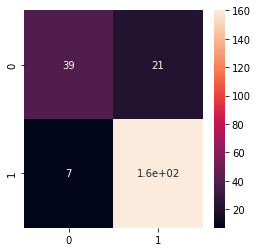

f1 is:  0.9195402298850575
ROC-AUC Score is:  0.8040419161676646


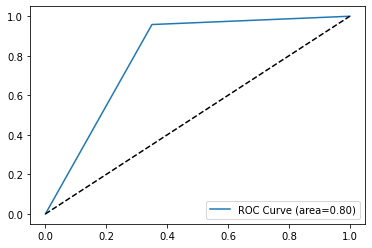

In [329]:
test_set_acc_svm = metrics.accuracy_score(y_test, predict_svm)
train_set_acc_svm = metrics.accuracy_score(y_train, clf.predict(X_train_pca))

print("Test set Accuracy: ", test_set_acc_svm)
print("Train set Accuracy: ", train_set_acc_svm)

print(confusion_matrix(y_test, predict_svm, labels=[1,0]))
print (classification_report(y_test, predict_svm))
cm = confusion_matrix(y_test, predict_svm)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_svm))

score_svm = roc_auc_score(y_test, predict_svm)
print('ROC-AUC Score is: ', score_svm)
fpr, tpr, thresholds = roc_curve(y_test, predict_svm)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_svm)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [330]:
cv_acc = df_svm[df_svm.C == 8]['mean acc in cross_validation'].values[0]
all_acc_svm = [cv_acc, test_set_acc_svm, train_set_acc_svm, score_svm]

In [331]:
df_acc_after_pca.loc['svm'] = all_acc_svm

# random forest

In [332]:
depth_list = [2, 4, 6, 8, 10, 12, 15, 20, 25]
df_forest = pd.DataFrame()
mean_list = []

for depth in depth_list:
    forest = RandomForestClassifier(criterion="entropy", max_depth = depth)
    scores = cross_val_score(forest, X_train_pca, y_train, cv=5)
    mean = scores.mean()
    mean_list.append(mean)
df_forest['depth'] = depth_list
df_forest['mean acc in cross_validation'] = mean_list
df_forest

,depth,mean acc in cross_validation
0,2,0.757592
1,4,0.793513
2,6,0.827601
3,8,0.833315
4,10,0.840863
5,12,0.842839
6,15,0.846559
7,20,0.844690
8,25,0.856083


In [333]:
forest = RandomForestClassifier(criterion="entropy", max_depth = 12)
forest.fit(X_train_pca, y_train)
predict_forest = forest.predict(X_test_pca)

Test set Accuracy:  0.8502202643171806
Train set Accuracy:  1.0
[[165   2]
 [ 32  28]]
              precision    recall  f1-score   support

           0       0.93      0.47      0.62        60
           1       0.84      0.99      0.91       167

    accuracy                           0.85       227
   macro avg       0.89      0.73      0.76       227
weighted avg       0.86      0.85      0.83       227



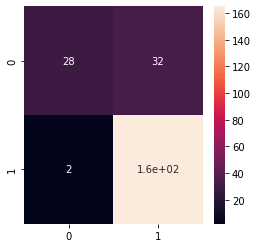

f1 is:  0.9065934065934065
ROC-AUC Score is:  0.7273453093812376


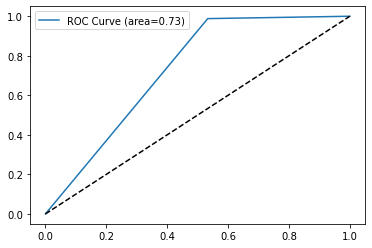

In [334]:
test_set_acc_forest = metrics.accuracy_score(y_test, predict_forest)
train_set_acc_forest = metrics.accuracy_score(y_train, forest.predict(X_train_pca))

print("Test set Accuracy: ", test_set_acc_forest)
print("Train set Accuracy: ", train_set_acc_forest)

print(confusion_matrix(y_test, predict_forest, labels=[1,0]))
print (classification_report(y_test, predict_forest))
cm = confusion_matrix(y_test, predict_forest)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

print('f1 is: ',f1_score(y_test, predict_forest))

score_forest = roc_auc_score(y_test, predict_forest)
print('ROC-AUC Score is: ', score_forest)
fpr, tpr, thresholds = roc_curve(y_test, predict_forest)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score_forest)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [335]:
cv_acc = df_forest[df_forest.depth == 12]['mean acc in cross_validation'].values[0]
all_acc_forest = [cv_acc, test_set_acc_forest, train_set_acc_forest, score_forest]

In [336]:
df_acc_after_pca.loc['RandomForestClassifier'] = all_acc_forest

# results

Now it's time for the conclusion. First, we examine the performance of the models before PCA. As you can see in the "df_acc_before_pca" table, the accuracy of all models for the test set is good. To be more precise, we can say that the accuracy of the KNN, SVM, and randomForest models in the test set is the same and better than that of the decisionTree model. However, considering the ROC-AUC Score, the KNN model outperforms the other models.

Now, let's move on to PCA. For lower parameters like numbers between 2 and 20, we encountered the problem of underfitting. In general, we did not observe a specific pattern of numbers for choosing the PCA parameter, except that as the parameter decreases, the accuracy of the KNN model usually decreases as well. When we chose 40 as the parameter for this task, the accuracy of the decisionTree model was higher, but the accuracy of KNN was lower. After PCA, the best model to choose is SVM. Therefore, it can be said that with a small number of features for the dataset, KNN is a better choice for training, and using KNN is not a good idea. However, when there are many features, using KNN is better for this dataset. It should be noted that after trying different numbers for the n_components parameter, we found that the accuracy for large numbers is usually not significantly different, and it is almost equal to the accuracy of the models when not using PCA.

In [337]:
df_acc_after_pca

,cv_acc,test_set_acc,train_set_acc,ROC-AUC Score
DecisionTreeClassifier,0.788014,0.832599,0.897727,0.774102
KNeighborsClassifier,0.844636,0.792952,0.969697,0.805888
svm,0.873136,0.876652,0.962121,0.804042
RandomForestClassifier,0.842839,0.850220,1.000000,0.727345


In [338]:
df_acc_before_pca

,cv_acc,test_set_acc,train_set_acc,ROC-AUC Score
DecisionTreeClassifier,0.757664,0.819383,0.952652,0.727745
KNeighborsClassifier,0.857951,0.863436,0.975379,0.859132
svm,0.888374,0.867841,1.000000,0.782036
RandomForestClassifier,0.852345,0.850220,0.986742,0.732685
